# Imports

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import pandas as pd
import numpy as np

from tqdm import tqdm

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Dataset

Using Sklearn's california housing dataset purely for educational purposes. To simplify it, we also do not use the whole dataset, rather a subset as shown later in the notebook.

In [3]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
df = pd.DataFrame(data = fetch_california_housing()['data'], columns=fetch_california_housing()['feature_names'])

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
# Target is median house value for Cali District, in thousands
df['target'] = fetch_california_housing()['target']

In [7]:
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


In [8]:
# Choosing variables with highest correlation. This may not necessarily be the best way for variable selection in practice. 
df.corr()['target'].sort_values(ascending = False)

target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64

In [9]:
df = df[['MedInc', 'AveRooms', 'target']][0:250]

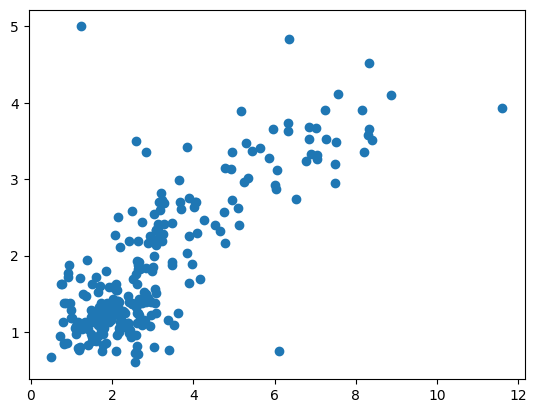

In [10]:
plt.scatter(x = df['MedInc'], y =  df['target'])
plt.show()

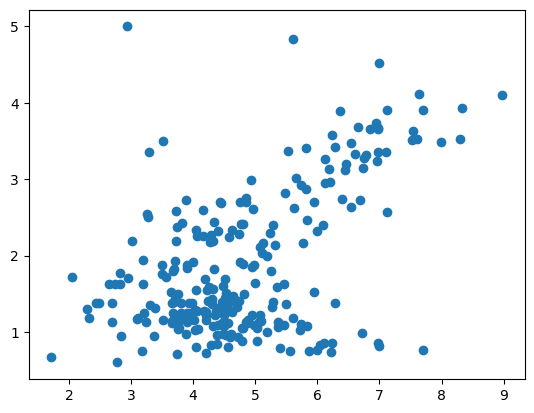

In [11]:
plt.scatter(x = df['AveRooms'], y =  df['target'])
plt.show()

# Multiple Linear Regression

Note that the code below is not scalable and very specific to the dataset. It is done to make it clear and easy to read, but as a result, it wouldn't be scalable to other problems.

In [12]:
class Linreg:

    def __init__(self, data, lr = 0.001):
        
        # Data
        self.data = data
        self.length = len(data)

        # Model for multiple linear regression of two variables y = m1x1 + m2x2 + b
        self.m1 = 0 # Coeffecient for Median Income (MedInc)
        self.m2 = 0 # Coeffecient for AveRoom (AveRoom)
        self.b = 0 # Coeffecient for intercept

        # Learning rate
        self.lr = lr

    def model(self):

        # Model Coeffecients
        print(f"m1: {self.m1}")
        print(f"m2: {self.m2}")
        print(f"b: {self.b}")
        # Full Form
        print(f"y = {self.m1} * x1 + {self.m2} * x2 + {self.b}")

    def loss(self):

        loss = 0
        # Calculate Loss using MSE Formula
        for i in range(self.length):
            prediction = (self.m1 * self.data.loc[i, 'MedInc'] + self.m2 * self.data.loc[i, 'AveRooms'] + self.b)

            loss += (self.data.loc[i, 'target'] - prediction) ** 2
    
        return loss

    def gradient_descent(self):
        
        # Find Gradients by taking partial derivative of each model parameter with respect to cost. Partial derivatives have been manually computed
        gradientm1 = 0
        gradientm2 = 0
        gradientb = 0

        for i in range(self.length):

            prediction = (self.m1 * self.data.loc[i, 'MedInc'] + self.m2 * self.data.loc[i, 'AveRooms'] + self.b)
            
            gradientm1 += -2 * (self.data.loc[i, 'target'] - prediction) * (self.data.loc[i, 'MedInc'])
            gradientm2 += -2 * (self.data.loc[i, 'target'] - prediction) * (self.data.loc[i, 'AveRooms'])
            gradientb += -2 * prediction

        # Update rule in Gradient Descent
        self.m1 = self.m1 - self.lr * (1 / self.length) * gradientm1
        self.m2 = self.m2 - self.lr * (1 / self.length) * gradientm2    
        self.b = self.b - self.lr * (1 / self.length) * gradientb
  
    def generateparam(self, epochs = 100):

        # Pipeline which uses gradient descent to train our model. Trains model until loss converges or reaches a minimum

        loss_amounts = []

        for i in tqdm(range(epochs)):

            loss_amount = self.loss()

            if i > 1:
                if loss_amount > loss_amounts[-1]:
                    print(f"stopped at {i} epoch")
                    print(f"Next Epoch loss: {loss_amount}")
                    print(f"Previous Loss: {loss_amounts[-1]}")
                    break

            loss_amounts.append(loss_amount)
            self.gradient_descent()

            if i % 50 == 0:
                print(f"Current epoch{i}, m1: {self.m1}, m2: {self.m2}, b: {self.b}, loss: {loss_amount}")

                plt.figure()
                ax = plt.axes(projection='3d')
                ax.scatter3D(self.data.loc[:,'MedInc'] , self.data.loc[:,'AveRooms'] , self.data.loc[:,'target'], alpha = 0.2)
                x1 = np.array(np.linspace(0,10,50))
                x2 = np.array(np.linspace(0,10,50))
                y = np.ndarray.flatten(self.m1 * x1 + self.m2 * x2 + self.b)
                ax.scatter3D(x1 , x2 , y)
                ax.set_xlabel('x1')
                ax.set_ylabel('x2')
                ax.set_zlabel('y')
                plt.show()

        plt.figure()
        plt.plot(loss_amounts)
        plt.title("Loss across epochs")

    def predict(self, x1, x2):
        
        prediction = (self.m1 * x1 + self.m2 * x2 + self.b)

        return prediction

    def evaluate_train(self):

        # Evaluate the training

        self.data['train_predictions'] = np.zeros(self.length)

        for i in range(self.length):
            self.data['train_predictions'].loc[i] = self.predict(self.data.loc[i, 'MedInc'], self.data.loc[i, 'AveRooms'])
            
        self.data['absloss'] = np.abs(self.data['target'] - self.data['train_predictions'])

        plt.figure()
        plt.scatter(x = self.data['target'], y = self.data['train_predictions'])
        plt.title("Actual vs Predicted")

        plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(self.data.loc[:,'MedInc'] , self.data.loc[:,'AveRooms'] , self.data.loc[:,'target'], alpha = 0.2)
        x1 = np.array(np.linspace(0,10,50))
        x2 = np.array(np.linspace(0,10,50))
        y = np.ndarray.flatten(self.m1 * x1 + self.m2 * x2 + self.b)
        ax.scatter3D(x1 , x2 , y)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')
        plt.show()
        return np.sum(self.data['absloss'])


# Train


In [13]:
houseprices = Linreg(df[0:200])

  0%|          | 0/450 [00:00<?, ?it/s]

Current epoch0, m1: 0.015626331876340004, m2: 0.0202950090374391, b: 0.0, loss: 966.5001060001


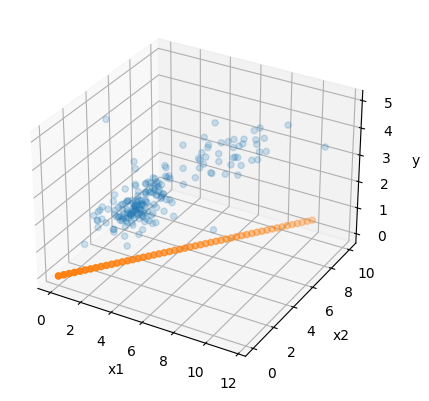

 10%|▉         | 43/450 [00:00<00:04, 92.39it/s]

Current epoch50, m1: 0.21269876822261682, m2: 0.2362985264281779, b: 0.15065628379885307, loss: 96.4853552321547


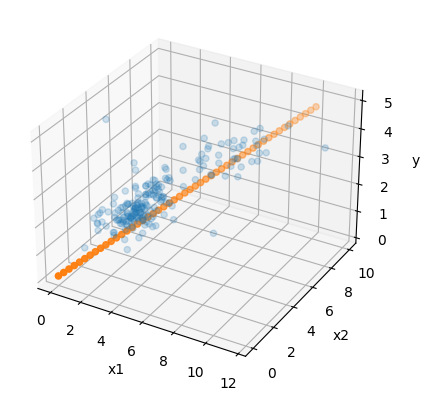

 21%|██▏       | 96/450 [00:01<00:03, 96.47it/s]

Current epoch100, m1: 0.22504064297709322, m2: 0.19807091994161294, b: 0.3504238414989734, loss: 93.09033383510935


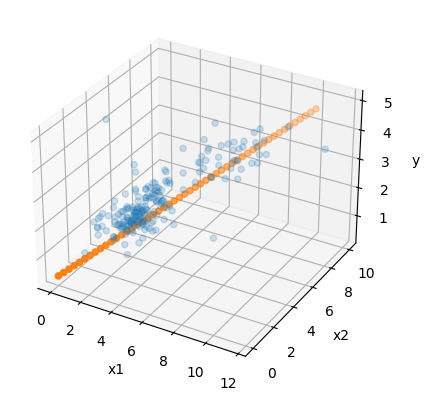

 33%|███▎      | 148/450 [00:01<00:03, 95.76it/s]

Current epoch150, m1: 0.2341387998697173, m2: 0.1536025565069705, b: 0.5527458263596787, loss: 90.18422313485172


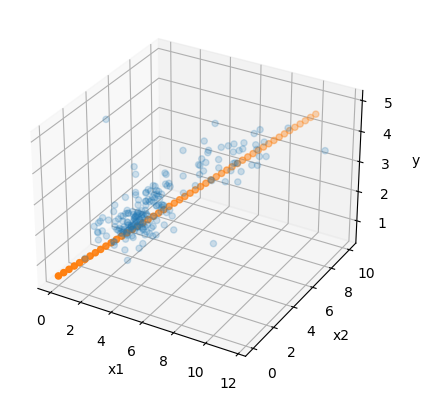

 42%|████▏     | 191/450 [00:02<00:02, 94.00it/s]

Current epoch200, m1: 0.24378974621277347, m2: 0.10826493419879087, b: 0.7566139307561637, loss: 88.22433596477396


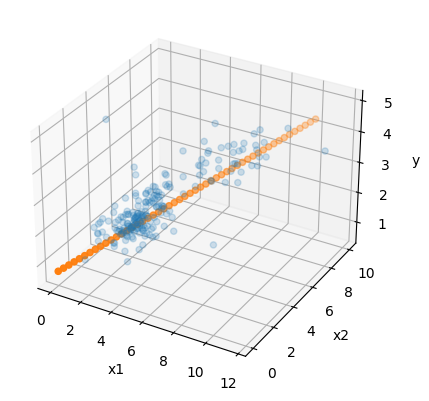

 54%|█████▍    | 243/450 [00:02<00:02, 94.87it/s]

Current epoch250, m1: 0.25400040597550566, m2: 0.062229121262522544, b: 0.9619974371610998, loss: 87.25866001225212


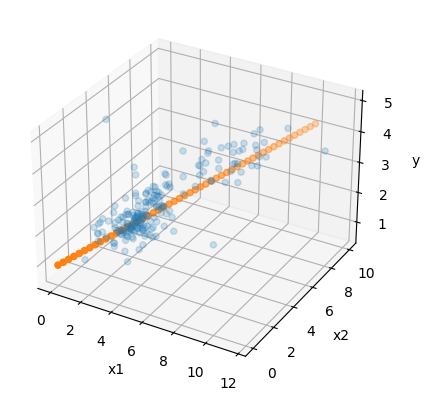

 61%|██████    | 273/450 [00:03<00:02, 85.88it/s]

stopped at 273 epoch
Next Epoch loss: 87.15673561138442
Previous Loss: 87.15661856802167


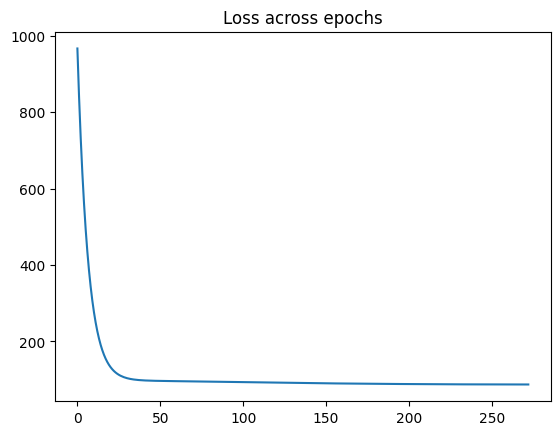

In [14]:
houseprices.generateparam(450)

/var/folders/bb/7x1l6zmd3blblnxk0dz1d27h0000gn/T/ipykernel_11744/2332546269.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['train_predictions'] = np.zeros(self.length)
/var/folders/bb/7x1l6zmd3blblnxk0dz1d27h0000gn/T/ipykernel_11744/2332546269.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['train_predictions'].loc[i] = self.predict(self.data.loc[i, 'MedInc'], self.data.loc[i, 'AveRooms'])
/var/folders/bb/7x1l6zmd3blblnxk0dz1d27h0000gn/T/ipykernel_11744/2332546269.py:111: SettingWithCopyWarning: 
A value is trying to be set on a c

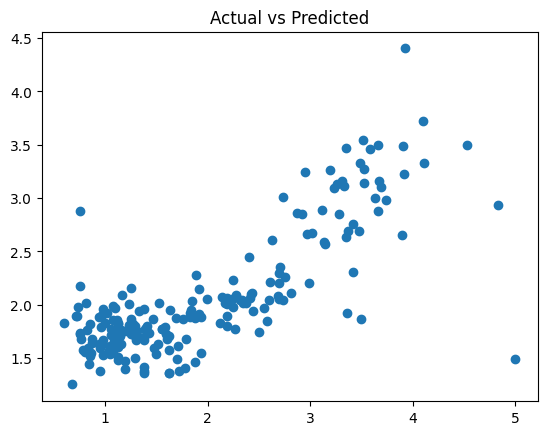

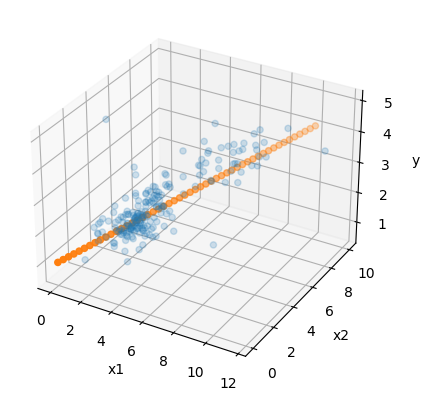

103.1560621528045

In [15]:
houseprices.evaluate_train()

In [16]:
houseprices.data.head(4)

,MedInc,AveRooms,target,train_predictions,absloss
0,8.3252,6.984127,4.526,3.497887,1.028113
1,8.3014,6.238137,3.585,3.460574,0.124426
2,7.2574,8.288136,3.521,3.276159,0.244841
3,5.6431,5.817352,3.413,2.755420,0.657580


# Test

We first test the results on our test set. We also benchmark against sklearn's regression results, to make sure that our regression is working properly

In [17]:
houseprices.model()

m1: 0.2586537573372041
m2: 0.041765890489686694
b: 1.0528443003098438
y = 0.2586537573372041 * x1 + 0.041765890489686694 * x2 + 1.0528443003098438


In [18]:
# Test Set
test_df = df[200:250]
test_df.head(4)

,MedInc,AveRooms,target
200,3.0257,4.046948,0.808
201,1.4886,4.025157,1.288
202,1.9338,3.242009,1.125
203,1.4844,3.866667,1.194


In [19]:
test_df['model_predict'] = 0.22504064297709322 * test_df['MedInc'] + 0.19807091994161294 * test_df['AveRooms'] + 0.3504238414989734
test_df

/var/folders/bb/7x1l6zmd3blblnxk0dz1d27h0000gn/T/ipykernel_11744/3166077249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['model_predict'] = 0.22504064297709322 * test_df['MedInc'] + 0.19807091994161294 * test_df['AveRooms'] + 0.3504238414989734


,MedInc,AveRooms,target,model_predict
200,3.0257,4.046948,0.808,1.832912
201,1.4886,4.025157,1.288,1.482686
202,1.9338,3.242009,1.125,1.427755
203,1.4844,3.866667,1.194,1.450348
204,1.6009,3.115846,1.181,1.327850
205,2.0375,4.944606,1.225,1.788327
206,2.2930,5.365297,1.063,1.929151
207,2.1494,4.479924,1.325,1.721469
208,1.6198,4.357143,1.227,1.577968
209,1.3281,5.054348,1.133,1.650420


In [33]:
# Our model results
print(f"MAE:{mean_absolute_error(test_df['target'], test_df['model_predict'])}")
print(f"MSE: {mean_squared_error(test_df['target'], test_df['model_predict'])}")

MAE:0.4226798297587122
MSE: 0.22945901721003442


In [21]:
model = LinearRegression()
estimator = model.fit(df[['MedInc', 'AveRooms']][0:200], df['target'][0:200])
print(model.coef_)
print(model.intercept_)

[ 0.44945339 -0.13214759]
1.181899206616098


In [22]:
model.predict(df[['MedInc', 'AveRooms']][200:250])

array([2.00701585, 1.31904069, 1.62262848, 1.33809713, 1.48967766,
       1.44424266, 1.50348478, 1.55594322, 1.33413788, 1.11089837,
       2.03955832, 2.27637976, 2.05400344, 1.75908071, 1.73642537,
       1.82756719, 1.81737836, 1.81321672, 1.85135339, 1.87667473,
       1.99045601, 1.96635959, 2.52497292, 2.56392855, 2.09005967,
       2.67783581, 2.3308983 , 2.37352618, 2.33088704, 1.82803666,
       2.46180272, 2.23573745, 2.11991385, 2.48354992, 1.87762838,
       1.6066704 , 1.82543668, 1.92274219, 1.67844732, 1.87444387,
       1.89124683, 1.2865459 , 1.80709807, 2.0699887 , 1.61338863,
       1.4018025 , 1.8786354 , 1.95748058, 1.42497915, 1.66884022])

In [25]:
# Sklearn results
print(f"MAE: {mean_absolute_error(df['target'][200:250], model.predict(df[['MedInc', 'AveRooms']][200:250]))}")
print(f"MSE: {mean_squared_error(df['target'][200:250], model.predict(df[['MedInc', 'AveRooms']][200:250]))}")

0.40361311406491196
0.22649902616172032
